In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly

In [2]:
mpl.rcParams['figure.figsize'] = (16, 9)
sns.set(style='darkgrid')

In [5]:
data_path = 'covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_raw = pd.read_csv(data_path)
df_raw.head()

FileNotFoundError: [Errno 2] File b'covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv' does not exist: b'covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [4]:
data_path2 = 'covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
df_raw_us = pd.read_csv(data_path2)
df_raw_us.head()

FileNotFoundError: [Errno 2] File b'covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv' does not exist: b'covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

In [4]:
time_idx = df_raw.columns[4:]
df_plot = pd.DataFrame({'date':time_idx})

In [5]:
country_lst =['Italy', 'US', 'Spain', 'Germany', 'Korea,South']


In [6]:
for each in country_lst:
    df_plot[each] = np.array(df_raw[df_raw['Country/Region'] == each].iloc[:,4:].sum(axis=0))

In [7]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea,South"
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,0,0
2,1/24/20,0,2,0,0,0
3,1/25/20,0,2,0,0,0
4,1/26/20,0,5,0,0,0


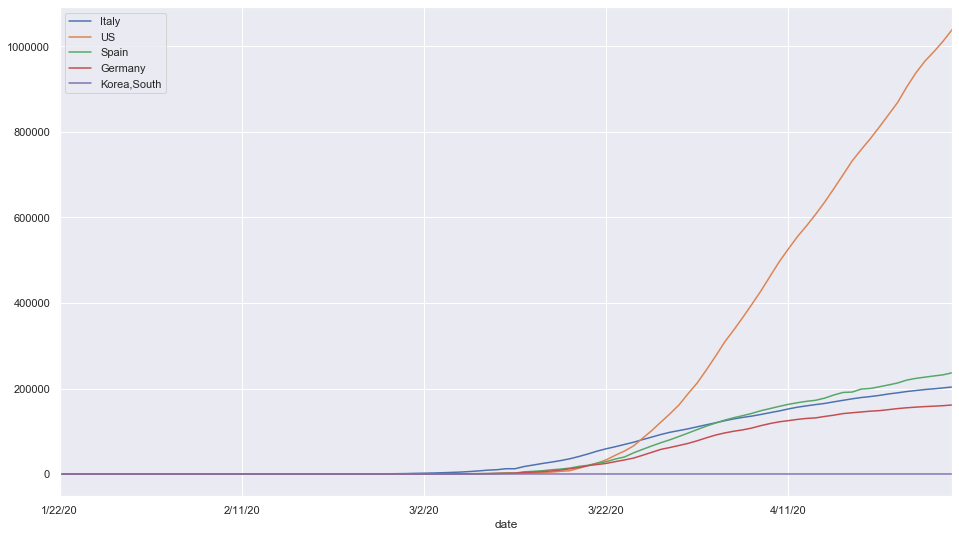

In [8]:
df_plot.set_index('date').plot()

In [9]:
time_idx = [datetime.strptime(x, "%m/%d/%y") for x in df_plot.date]

In [10]:
df_plot['date'] = time_idx
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea,South"
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


In [12]:
df_plot.to_csv('covid-19/data/processed/COVID_small_flat_table.csv', sep='\t', index = False)

In [13]:
pd_date_base = df_raw.rename(columns={'Country/Region': 'country',
                                     'Province/State':'state'})

In [14]:
pd_date_base = pd_date_base.drop(['Lat','Long'],axis=1)
pd_date_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939
1,NaN,Albania,0,0,0,0,0,0,0,0,...,584,609,634,663,678,712,726,736,750,766
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,717,723,723,731,738,738,743,743,743
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,24,25,25,25,25,26,27,27,27


In [15]:
test_pd = pd_date_base.set_index(['state','country']).T

In [16]:
pd_relational_model = pd_date_base.set_index(['state','country']).T \
                        .stack(level =[0,1]).reset_index() \
                        .rename(columns={'level_0':'date', 0:'confirmed'})

In [17]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [18]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [19]:
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[ns]')

In [20]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea,South"
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


<Figure size 1152x648 with 0 Axes>

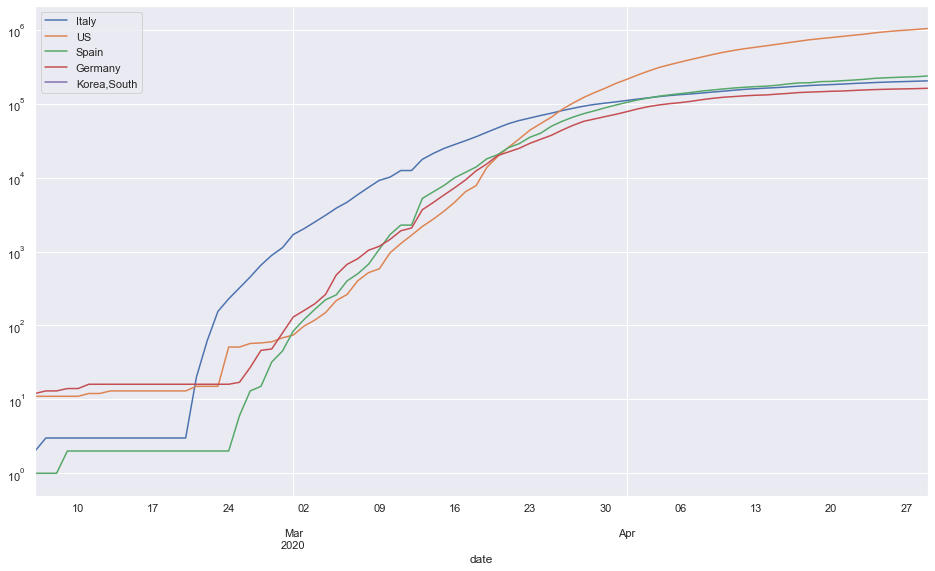

In [21]:
plt.figure()
ax = df_plot.iloc[15:,:].set_index('date').plot()
ax.set_yscale('log')

In [22]:
fig = go.Figure()
for ct in country_lst:  
    fig.add_trace(go.Scatter(x = df_plot.date, 
                             y = df_plot[ct], 
                             mode ='markers+lines',
                             opacity = 0.9, 
                             line_width = 2, 
                             marker_size = 4,
                             name = ct))

fig.update_layout(width= 800, 
                 height= 600,
                 xaxis_title = 'Time',
                 yaxis_title = 'Confirmed infected people, log-scale')
fig.update_yaxes(type='log', range=[1.1, 5.5])
fig.update_layout(xaxis_rangeslider_visible = True)
fig.show(renderer='chrome')

In [23]:
import dash 
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Korea, South', 'value': 'Korea, South'}
        ],
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [24]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope','figure'),
    [Input('country_drop_down', 'value')]
)
def update_figure(country_list):
    traces = []
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
    return {
        'data':traces,
        'layout':dict(
            width= 800, 
            height= 600,
            xaxis_title = 'Time',
            yaxis_title = 'Confirmed infected people, log-scale'
        )
    }


In [ ]:
if __name__ == '__main__':
    app.run_server(host='127.0.0.1', debug=True, use_reloader=False)

Running on http://127.0.0.1:8050/
Debugger PIN: 756-199-205
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
